<a href="https://colab.research.google.com/github/KarlmerABC/Diamonds_Project/blob/main/diamonds_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
    Copyright (c) 2021 UNISAL - Campus São José
    GUSTAVO EDUARDO SILVA MACHADO
    KARLMER ABEL BUENO CORRÊA
    TIAGO DE FREITAS FAUSTINO
"""

In [ ]:
!pip3 install wget

In [ ]:
"""
    PROCESSO 0 - Importação das bibliotecas e pacotes utilizados

"""
import os
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import graphviz
from lazypredict.Supervised import LazyRegressor, LazyClassifier
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor # Import Random Forest Regressor
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
import wget

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
"""
    PROCESSO 1 - Seleção dos dados - Dataset-> Diamonds

"""

In [ ]:
url_obs = 'https://raw.githubusercontent.com/KarlmerABC/Daimonds_Project/main/Dataset/Diamonds.csv' 
arquivo = pd.read_csv(url_obs, sep=',')

In [ ]:
"""
    PROCESSO 2 - Pré-processamento

"""

In [ ]:
# Visualização
arquivo.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [ ]:
# Eliminação da coluna  "ID"
arquivo = arquivo.drop(columns='id')

In [ ]:
# Pré-processamento 1 - Eliminação de valores inconsistentes - Analisando as variáveis X, Y e Z
### Características físicas do diamente
arquivo.describe()

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [ ]:
df = pd.DataFrame(arquivo)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [ ]:
# Aplicação do .loc - Eliminação por Linha do Dataset
df = df.drop(df.loc[df.x == 0].index)
df = df.drop(df.loc[df.y == 0].index)
df = df.drop(df.loc[df.z == 0].index)

In [ ]:
# Processado 1 - Eliminação de valores inconsistentes - Analisando as variáveis X, Y e Z
df.describe()

,carat,depth,table,price,x,y,z
count,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00
mean,0.80,61.75,57.46,3930.99,5.73,5.73,3.54
std,0.47,1.43,2.23,3987.28,1.12,1.14,0.70
min,0.20,43.00,43.00,326.00,3.73,3.68,1.07
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5323.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


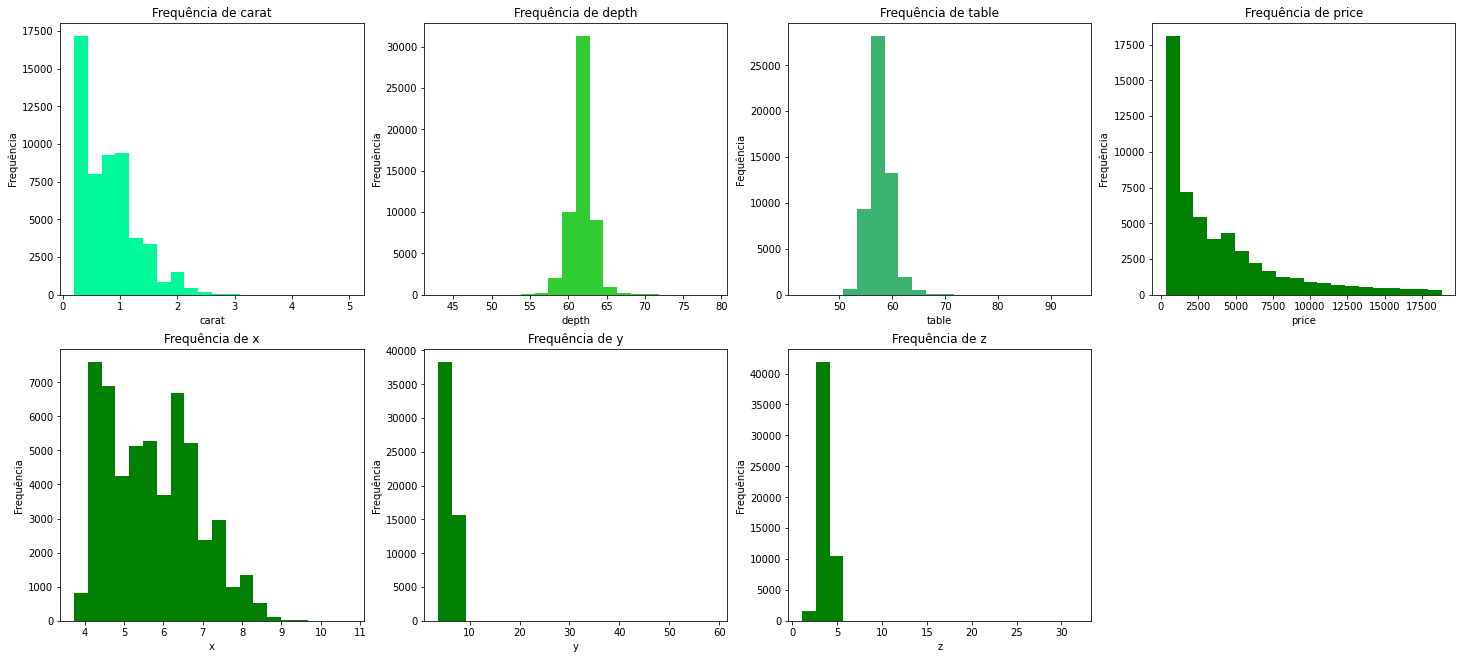

In [ ]:
plt.figure(figsize=[25,17])


plt.subplot(341) # nrows=2, ncols=3
plt.hist(df['carat'],bins=20,color='mediumspringgreen')
plt.xlabel('carat')
plt.ylabel('Frequência')
plt.title('Frequência de carat');


plt.subplot(342)
plt.hist(df['depth'],bins=20,color='limegreen')
plt.xlabel('depth')
plt.ylabel('Frequência')
plt.title('Frequência de depth');


plt.subplot(343)
plt.hist(df['table'],bins=20,color='mediumseagreen')
plt.xlabel('table')
plt.ylabel('Fequência')
plt.title('Frequência de table');


plt.subplot(344)
plt.hist(df['price'],bins=20,color='green')
plt.xlabel('price')
plt.ylabel('Frequência')
plt.title('Frequência de price');

plt.subplot(345)
plt.hist(df['x'],bins=20,color='green')
plt.xlabel('x')
plt.ylabel('Frequência')
plt.title('Frequência de x');

plt.subplot(346)
plt.hist(df['y'],bins=20,color='green')
plt.xlabel('y')
plt.ylabel('Frequência')
plt.title('Frequência de y');

plt.subplot(347)
plt.hist(df['z'],bins=20,color='green')
plt.xlabel('z')
plt.ylabel('Frequência')
plt.title('Frequência de z');

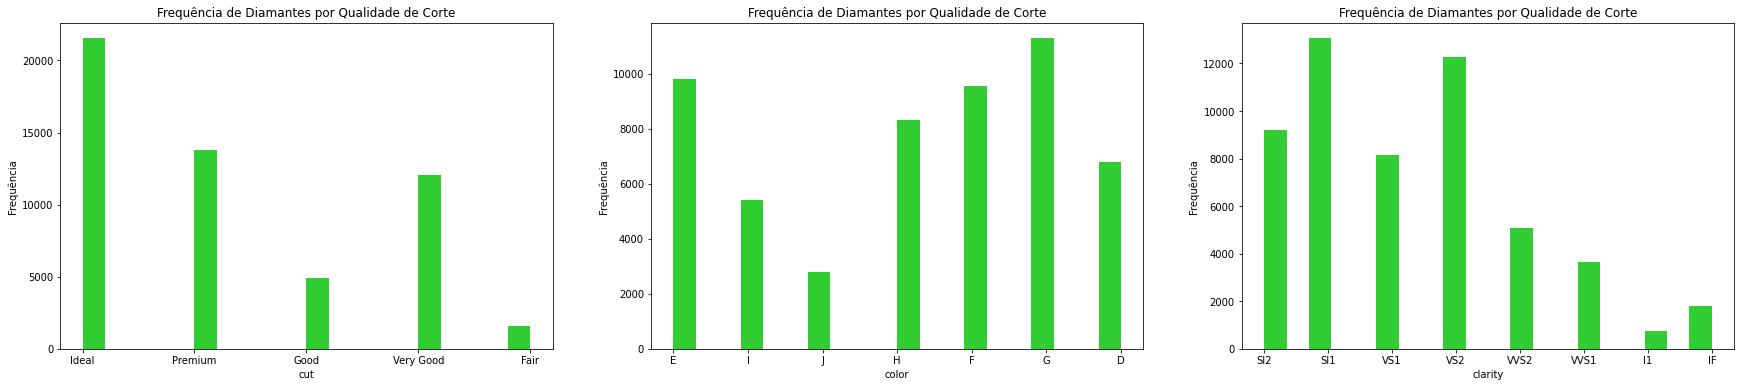

In [ ]:
plt.figure(figsize=[30,6])
# carat	cut	color	clarity	depth	table	price	x	y	z

plt.subplot(131)
plt.hist(df['cut'],bins=20,color='limegreen')
plt.xlabel('cut')
plt.ylabel('Frequência')
plt.title('Frequência de Diamantes por Qualidade de Corte');

plt.subplot(132)
plt.hist(df['color'],bins=20,color='limegreen')
plt.xlabel('color')
plt.ylabel('Frequência')
plt.title('Frequência de Diamantes por Qualidade de Corte');

plt.subplot(133)
plt.hist(df['clarity'],bins=20,color='limegreen')
plt.xlabel('clarity')
plt.ylabel('Frequência')
plt.title('Frequência de Diamantes por Qualidade de Corte');

Text(0.5, 0, 'Variável Z')

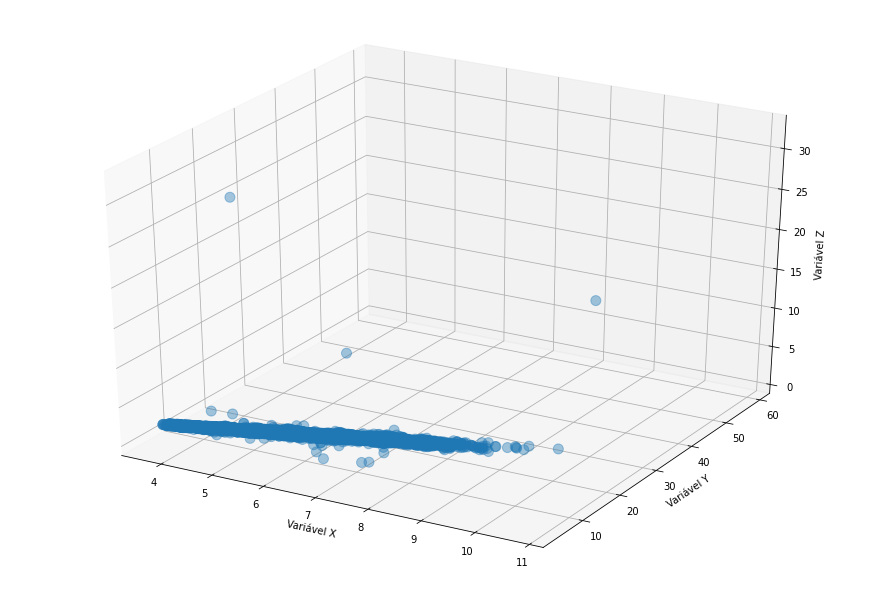

In [ ]:
# Pré-processamento 2 - Identificação dos Outliers - Analisando as variáveis X, Y e Z
arquivo=df
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

# Plot 3D
ax.scatter(xs=arquivo['x'], ys=arquivo['y'], zs=arquivo['z'], s=100, alpha=0.4)
ax.set_xlabel('Variável X')
ax.set_ylabel('Variável Y')
ax.set_zlabel('Variável Z')

In [ ]:
# Processado 2 - Identificação dos Outliers e remoção dos Y e Z
arquivo = arquivo.drop(arquivo.loc[arquivo.y > 35].index)
arquivo = arquivo.drop(arquivo.loc[arquivo.z > 25].index)

Text(0.5, 0, 'Variável Z')

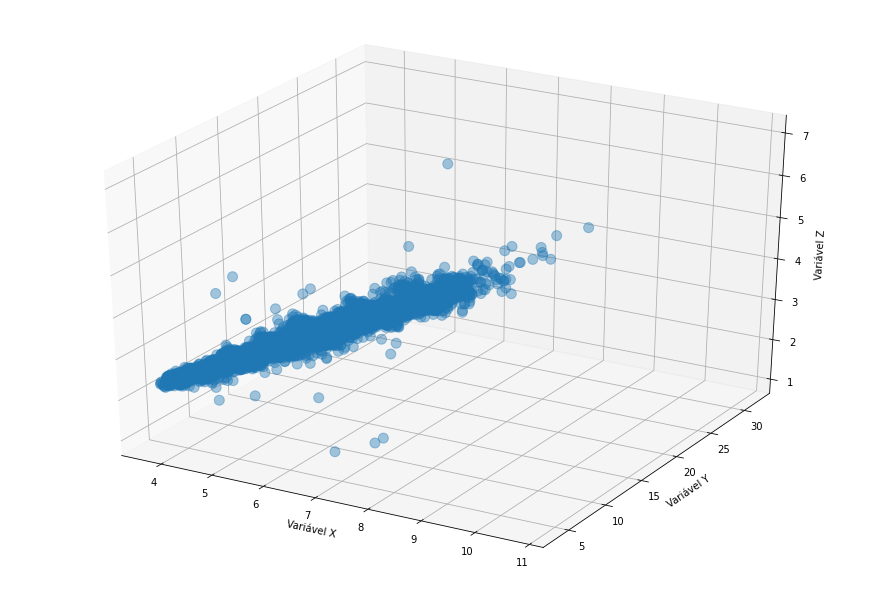

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=arquivo['x'], ys=arquivo['y'], zs=arquivo['z'], s=100, alpha=0.4)
ax.set_xlabel('Variável X')
ax.set_ylabel('Variável Y')
ax.set_zlabel('Variável Z')

In [ ]:
# Calculo do Volume
arquivo['volume'] = arquivo['x']*arquivo['y']*arquivo['z']
arquivo = arquivo.drop(['x','y','z'],axis=1)

In [ ]:
"""
    PROCESSO 3 -> Transformação dos dados

"""
### Transformação 1 - Transformação em Fator das variáveis Categóricas

# Transformação CUT p/ Fator
arquivo['cut'] = arquivo['cut'].replace('Fair', 0)
arquivo['cut'] = arquivo['cut'].replace('Good', 1)
arquivo['cut'] = arquivo['cut'].replace('Very Good', 2)
arquivo['cut'] = arquivo['cut'].replace('Premium', 3)
arquivo['cut'] = arquivo['cut'].replace('Ideal', 4)

# Transformação COLOR p/ Fator
arquivo['color'] = arquivo['color'].replace('J', 0)
arquivo['color'] = arquivo['color'].replace('I', 1)
arquivo['color'] = arquivo['color'].replace('H', 2)
arquivo['color'] = arquivo['color'].replace('G', 3)
arquivo['color'] = arquivo['color'].replace('F', 4)
arquivo['color'] = arquivo['color'].replace('E', 5)
arquivo['color'] = arquivo['color'].replace('D', 6)

# Transformação CLARITY p/ Fator
arquivo['clarity'] = arquivo['clarity'].replace('I1', 0)
arquivo['clarity'] = arquivo['clarity'].replace('SI2', 1)
arquivo['clarity'] = arquivo['clarity'].replace('SI1', 2)
arquivo['clarity'] = arquivo['clarity'].replace('VS2', 3)
arquivo['clarity'] = arquivo['clarity'].replace('VS1', 4)
arquivo['clarity'] = arquivo['clarity'].replace('VVS2', 5)
arquivo['clarity'] = arquivo['clarity'].replace('VVS1', 6)
arquivo['clarity'] = arquivo['clarity'].replace('IF', 7)

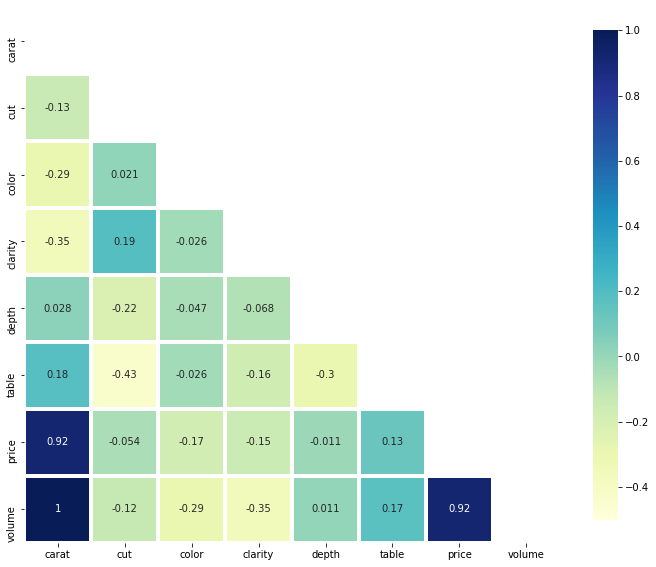

In [ ]:
mapa = arquivo.select_dtypes(include = ['int64', 'float64']).corr();

mascara = np.zeros_like(mapa, dtype = np.bool)
mascara[np.triu_indices_from(mascara)] = True
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(mapa, mask = mascara, vmin = -0.5, vmax = 1, annot = True,
square = True, linewidths = 3, cbar_kws = {"shrink": 0.75}, cmap="YlGnBu");

In [ ]:
# Separando as variaveis entre preditoras e variável alvo - No caso desejamos estimar a variável PRICE
y = arquivo['price']
X = arquivo.drop('price', axis=1)

In [ ]:
 ### Separação dos dados em treino e teste
 X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=1, test_size=0.3)

In [ ]:
### Transformação 2 - Normalização das Variáveis

scaler = StandardScaler()

X_treino_s = X_treino.copy()
X_treino_s[['carat','table','volume','cut','depth']]=scaler.fit_transform(X_treino_s[['carat','table','volume','cut','depth']])
normalized_x_treino = pd.DataFrame(X_treino_s, columns = X_treino.columns)
X_treino = normalized_x_treino
X_teste_s = X_teste.copy()
X_teste_s[['carat','table','volume','cut','depth']] = scaler.transform(X_teste_s[['carat','table','volume','cut','depth']])
normalized_x_teste = pd.DataFrame(X_teste_s, columns = X_teste.columns)
X_teste = normalized_x_teste

In [ ]:
# Função de diferença entre os algoritmos
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Preço Estimado', ylabel = 'Preço Real - Preço Estimado', title = 'Intervalo entre o que é desejado e o que está presente nos dados')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

In [ ]:
"""
    Processos 4 e 5 - Mineração dos dados (Aplicação dos algoritmos) / Avaliação e interpretação dos resultados

"""

In [ ]:
#==============================#
# Model 00 ___ Dummy Regressor
#==============================#

In [ ]:
# The model choosen
dummy_reg = DummyRegressor(strategy="median")
# Fit the model
dummy_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
dummy_reg_pred = dummy_reg.predict(X_teste)

In [ ]:
# Print the accuracy by each measure:
print('Dummy regression accuracy: ')
crossr = cross_val_score(estimator = dummy_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
msed = mean_squared_error(y_teste, dummy_reg_pred)
rmsed = mean_squared_error(y_teste, dummy_reg_pred)**0.5
maed = mean_absolute_error(y_teste, dummy_reg_pred)
r2d = r2_score(y_teste, dummy_reg_pred)

print('Cross val     : ',crossr)
print('R2            : ', r2d)
print('MAE           : ', maed)
print('MSE (RMSE)    : ', msed,' (',rmsed,')')

Dummy regression accuracy: 
Cross val     :  [-0.15196595 -0.15957589 -0.13239198 -0.15287487]
R2            :  -0.1520358959885444
MAE           :  2772.3613377843717
MSE (RMSE)    :  17774809.641629573  ( 4216.018221216504 )


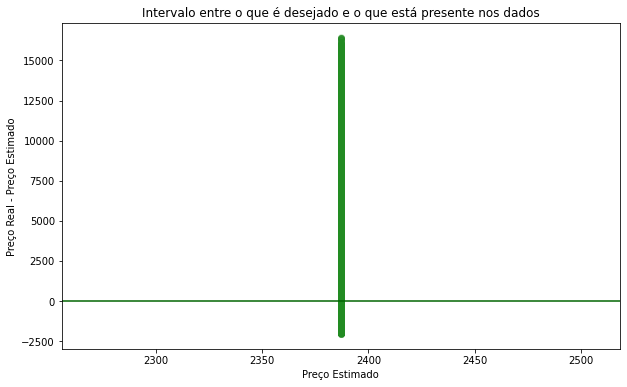

In [ ]:
differencePlot(y_teste, dummy_reg_pred, 'forestgreen', 'darkgreen')

In [ ]:
#================================#
# Model 01 ___ Linear Regression
#================================#

In [ ]:
# The model choosen
lin_reg = LinearRegression()
# Fit the model
lin_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
lin_reg_pred = lin_reg.predict(X_teste)

In [ ]:
# Print the accuracy by each measure:
print('Linear Regressor accuracy: ')
crossr = cross_val_score(estimator = lin_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
mser = mean_squared_error(y_teste, lin_reg_pred)
rmser = mean_squared_error(y_teste, lin_reg_pred)**0.5
maer = mean_absolute_error(y_teste, lin_reg_pred)
r2r = r2_score(y_teste, lin_reg_pred)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Linear Regressor accuracy: 
Cross val     :  [0.89718917 0.9022417  0.90444793 0.9085884 ]
R2            :  0.9057252847678912
MAE           :  844.3574547349529
MSE (RMSE)    :  1454568.493138545  ( 1206.0549295693563 )


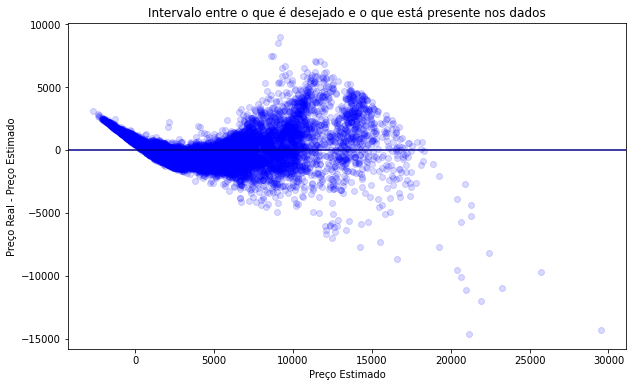

In [ ]:
differencePlot(y_teste, lin_reg_pred, 'blue', 'darkblue')

In [ ]:
#=====================================#
# Model 02 ___ Random Forest Regressor
#=====================================#

In [ ]:
# The model choosen
rf_reg = RandomForestRegressor(n_estimators = 10)
# Fit the model
rf_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
rf_reg_pre = rf_reg.predict(X_teste)

In [ ]:
# print the accuracy by each measure:
print('Random Forest Regressor accuracy: ')
crossr = cross_val_score(estimator = rf_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
mser = mean_squared_error(y_teste, rf_reg_pre)
rmser = mean_squared_error(y_teste, rf_reg_pre)**0.5
maer = mean_absolute_error(y_teste, rf_reg_pre)
r2r = r2_score(y_teste, rf_reg_pre)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
Cross val     :  [0.97768915 0.97709719 0.97815285 0.97846163]
R2            :  0.9806624117676497
MAE           :  283.55771759406446
MSE (RMSE)    :  298360.45122821565  ( 546.2238105650611 )


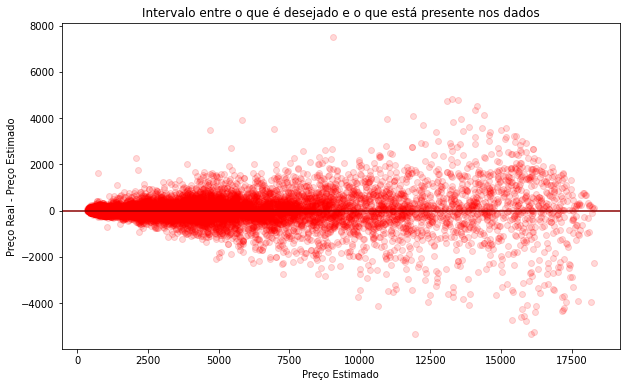

In [ ]:
differencePlot(y_teste, rf_reg_pre, 'red', 'darkred')

In [ ]:
#==================================#
# Model 03 ___ KNeighborsRegressor
#==================================#

In [ ]:
# The model choosen
kdd_reg = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
# Fit the model
kdd_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
kdd_reg_pre = kdd_reg.predict(X_teste)

In [ ]:
# print the accuracy by each measure:
print('KNeighbors Regressor accuracy: ')
crossr = cross_val_score(estimator = kdd_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
mser = mean_squared_error(y_teste, kdd_reg_pre)
rmser = mean_squared_error(y_teste, kdd_reg_pre)**0.5
maer = mean_absolute_error(y_teste, kdd_reg_pre)
r2r = r2_score(y_teste, kdd_reg_pre)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

KNeighbors Regressor accuracy: 
Cross val     :  [0.962003   0.96216581 0.96283371 0.96303816]
R2            :  0.9657243614586464
MAE           :  420.62084260633037
MSE (RMSE)    :  528840.2492832746  ( 727.214032650137 )


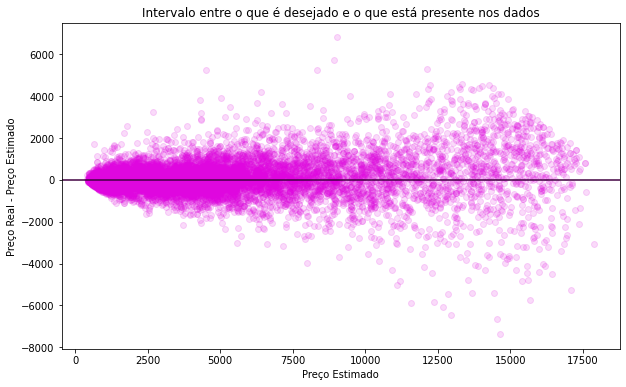

In [ ]:
differencePlot(y_teste, kdd_reg_pre, '#df07df', '#400040')